# Bibliotecas


In [ ]:
from google.colab import drive
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Resultados


In [ ]:
# Montar o Google Drive
drive.mount('/content/drive')
caminho_do_arquivo = '/content/drive/MyDrive/DatasetTCC/Resultados.csv'

try:
    # Ler o arquivo CSV em um DataFrame do pandas
    df = pd.read_csv(caminho_do_arquivo)
    print("Arquivo CSV lido com sucesso!")
    display(df.head()) # Mostra as primeiras linhas do DataFrame
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado: {caminho_do_arquivo}")
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo: {e}")

Mounted at /content/drive
Arquivo CSV lido com sucesso!


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE
0,https://g1.globo.com/politica/noticia/2025/11/...,O presidente Luiz Inácio Lula da Silva (PT) af...,"No dia seguinte à operação, o governador do Ri...","Na manifestação desta terça, Lula faz a primei...",O presidente Luiz Inácio Lula da Silva (PT) af...,O presidente Luiz Inácio Lula da Silva (PT) de...,dtc:0\r\nlogreg:1\r\npac:0\r\nrfc:0\r\nsvc:0,dtc:0\r\nlogreg:1\r\npac:0\r\nrfc:0\r\nsvc:0,dtc:0\r\nlogreg:0\r\npac:1\r\nrfc:0\r\nsvc:1,dtc:0\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:0\nlogreg:1\npac:0\nrfc:1\nsvc:0,1
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\r\nlogreg:1\r\npac:0\r\nrfc:0\r\nsvc:0,dtc:0\r\nlogreg:1\r\npac:0\r\nrfc:0\r\nsvc:0,1
2,https://entretenimento.r7.com/prisma/fabiola-r...,O nome de Dado Dolabella voltou a virar assunt...,Ele então tentou contextualizar a situação: “E...,"Questionado sobre o incidente, o ator responde...",O nome de Dado Dolabella voltou a virar assunt...,O nome de Dado Dolabella voltou a virar assunt...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\r\nlogreg:1\r\npac:0\r\nrfc:0\r\nsvc:0,1
3,https://g1.globo.com/economia/censo/noticia/20...,O Instituto Brasileiro de Geografia e Estatíst...,O 2º sobrenome mais popular do Brasil é Santos...,No site do IBGE é possível consultar quão popu...,O Instituto Brasileiro de Geografia e Estatíst...,O Instituto Brasileiro de Geografia e Estatíst...,dtc:1\r\nlogreg:0\r\npac:0\r\nrfc:0\r\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\r\nlogreg:0\r\npac:0\r\nrfc:0\r\nsvc:0,dtc:1\nlogreg:1\npac:0\nrfc:0\nsvc:0,1
4,https://esportes.r7.com/lance/lutador-e-dispen...,"Uma controversa no UFC Vegas 110, neste sábado...","A suspeita surgiu, então, com o aumento consid...","A atuação de Dulgarian no ringue, durante o UF...","Uma controversa no UFC Vegas 110, neste sábado...","Uma controversa no UFC Vegas 110, neste sábado...",dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\r\nlogreg:0\r\npac:0\r\nrfc:0\r\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1


In [ ]:
def clean_result_string(result_string):
  """Replaces '\r\n' and '\n' characters with a newline character for display.

  Args:
    result_string: The input string to be cleaned.

  Returns:
    The string with replaced newline characters.
  """
  cleaned_string = result_string.replace('\r\n', '\n')
  cleaned_string = cleaned_string.replace('\n', '\n') # This line might be redundant if \r\n is handled first, but it doesn't hurt.
  return cleaned_string


# Get a sample string from the cleaned DataFrame
sample_result = df['Resultados_1'].iloc[0]

# Print the sample string to see the line breaks
print("Exemplo de string limpa com quebras de linha:")
print(sample_result)

Exemplo de string limpa com quebras de linha:
dtc:0
logreg:1
pac:0
rfc:0
svc:0


In [ ]:
columns_to_clean = ['Resultados_1', 'Resultados_2', 'Resultados_3', 'Resultados_Junção', 'Resultados_Completa']

for col in columns_to_clean:
  df[col] = df[col].apply(clean_result_string)

display(df.head())
print(df['Resultados_1'][0])

,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE
0,https://g1.globo.com/politica/noticia/2025/11/...,O presidente Luiz Inácio Lula da Silva (PT) af...,"No dia seguinte à operação, o governador do Ri...","Na manifestação desta terça, Lula faz a primei...",O presidente Luiz Inácio Lula da Silva (PT) af...,O presidente Luiz Inácio Lula da Silva (PT) de...,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:0\nlogreg:1\npac:0\nrfc:1\nsvc:0,1
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1
2,https://entretenimento.r7.com/prisma/fabiola-r...,O nome de Dado Dolabella voltou a virar assunt...,Ele então tentou contextualizar a situação: “E...,"Questionado sobre o incidente, o ator responde...",O nome de Dado Dolabella voltou a virar assunt...,O nome de Dado Dolabella voltou a virar assunt...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1
3,https://g1.globo.com/economia/censo/noticia/20...,O Instituto Brasileiro de Geografia e Estatíst...,O 2º sobrenome mais popular do Brasil é Santos...,No site do IBGE é possível consultar quão popu...,O Instituto Brasileiro de Geografia e Estatíst...,O Instituto Brasileiro de Geografia e Estatíst...,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:0\nrfc:0\nsvc:0,1
4,https://esportes.r7.com/lance/lutador-e-dispen...,"Uma controversa no UFC Vegas 110, neste sábado...","A suspeita surgiu, então, com o aumento consid...","A atuação de Dulgarian no ringue, durante o UF...","Uma controversa no UFC Vegas 110, neste sábado...","Uma controversa no UFC Vegas 110, neste sábado...",dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1


dtc:0
logreg:1
pac:0
rfc:0
svc:0


In [ ]:
columns_to_compare = ['Resultados_1', 'Resultados_2', 'Resultados_3', 'Resultados_Junção', 'Resultados_Completa']
comparison_results = {}

for col in columns_to_compare:
    comparison_results[col] = []
    for index, row in df.iterrows():
        result_string = row[col]
        real_or_fake = str(row['REAL_OU_FAKE']) # Ensure it's a string for comparison

        # Extract the binary results (0 or 1) from the string
        # This regex looks for a colon followed by a digit
        matches = re.findall(r':(\d)', result_string)
        binary_results = [int(match) for match in matches]

        # Compare with REAL_OU_FAKE and count matches
        match_count = 0
        for result in binary_results:
            if result == int(real_or_fake):
                match_count += 1

        # Calculate percentage of matching digits
        total_digits = len(binary_results)
        if total_digits > 0:
            match_percentage = (match_count / total_digits) * 100
        else:
            match_percentage = 0 # Handle cases with no digits found

        comparison_results[col].append(match_percentage)

# Add the percentages as new columns to the DataFrame
for col in columns_to_compare:
    df[f'{col}_Match_Percentage'] = comparison_results[col]

# Display the DataFrame with the new percentage columns
display(df.head())

,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
0,https://g1.globo.com/politica/noticia/2025/11/...,O presidente Luiz Inácio Lula da Silva (PT) af...,"No dia seguinte à operação, o governador do Ri...","Na manifestação desta terça, Lula faz a primei...",O presidente Luiz Inácio Lula da Silva (PT) af...,O presidente Luiz Inácio Lula da Silva (PT) de...,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:0\nlogreg:1\npac:0\nrfc:1\nsvc:0,1,20.0,20.0,40.0,80.0,40.0
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0
2,https://entretenimento.r7.com/prisma/fabiola-r...,O nome de Dado Dolabella voltou a virar assunt...,Ele então tentou contextualizar a situação: “E...,"Questionado sobre o incidente, o ator responde...",O nome de Dado Dolabella voltou a virar assunt...,O nome de Dado Dolabella voltou a virar assunt...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,0.0,20.0
3,https://g1.globo.com/economia/censo/noticia/20...,O Instituto Brasileiro de Geografia e Estatíst...,O 2º sobrenome mais popular do Brasil é Santos...,No site do IBGE é possível consultar quão popu...,O Instituto Brasileiro de Geografia e Estatíst...,O Instituto Brasileiro de Geografia e Estatíst...,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,20.0,0.0,0.0,20.0,40.0
4,https://esportes.r7.com/lance/lutador-e-dispen...,"Uma controversa no UFC Vegas 110, neste sábado...","A suspeita surgiu, então, com o aumento consid...","A atuação de Dulgarian no ringue, durante o UF...","Uma controversa no UFC Vegas 110, neste sábado...","Uma controversa no UFC Vegas 110, neste sábado...",dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1,0.0,0.0,20.0,0.0,80.0


In [ ]:
percentage_columns = [col for col in df.columns if col.endswith('_Match_Percentage')]
descriptive_stats = df[percentage_columns].describe()
display(descriptive_stats)

,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,55.600000,56.400000,56.400000,66.000000,71.200000
std,45.227768,45.658895,46.192145,38.385797,30.009522
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,5.000000,0.000000,0.000000,20.000000,40.000000
50%,60.000000,80.000000,80.000000,80.000000,80.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


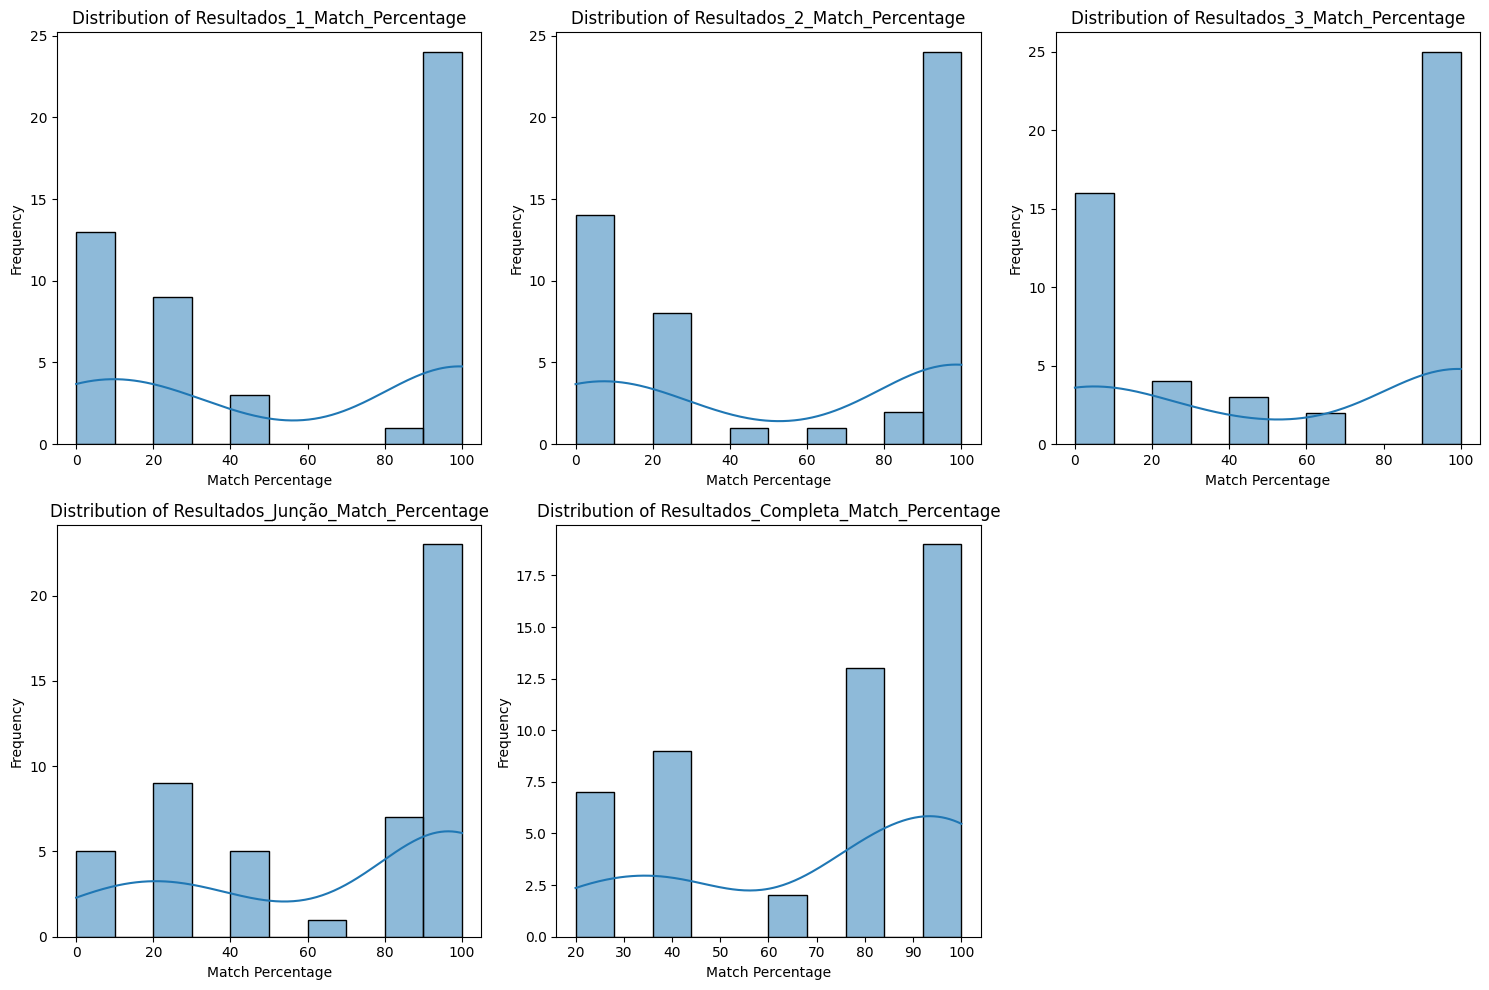

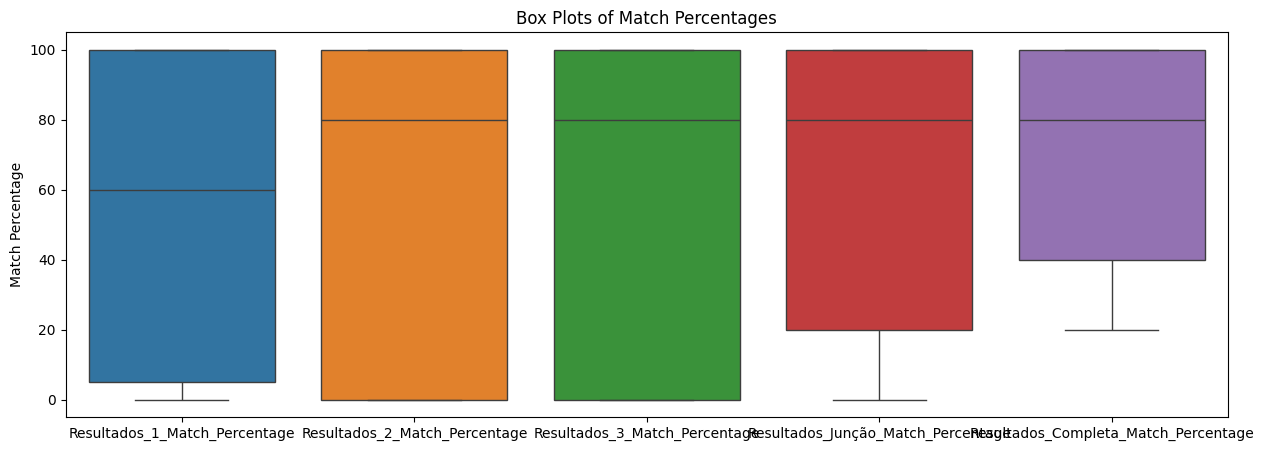

In [ ]:
percentage_columns = [col for col in df.columns if col.endswith('_Match_Percentage')]

plt.figure(figsize=(15, 10))
for i, col in enumerate(percentage_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Match Percentage')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(data=df[percentage_columns])
plt.title('Box Plots of Match Percentages')
plt.ylabel('Match Percentage')
plt.show()

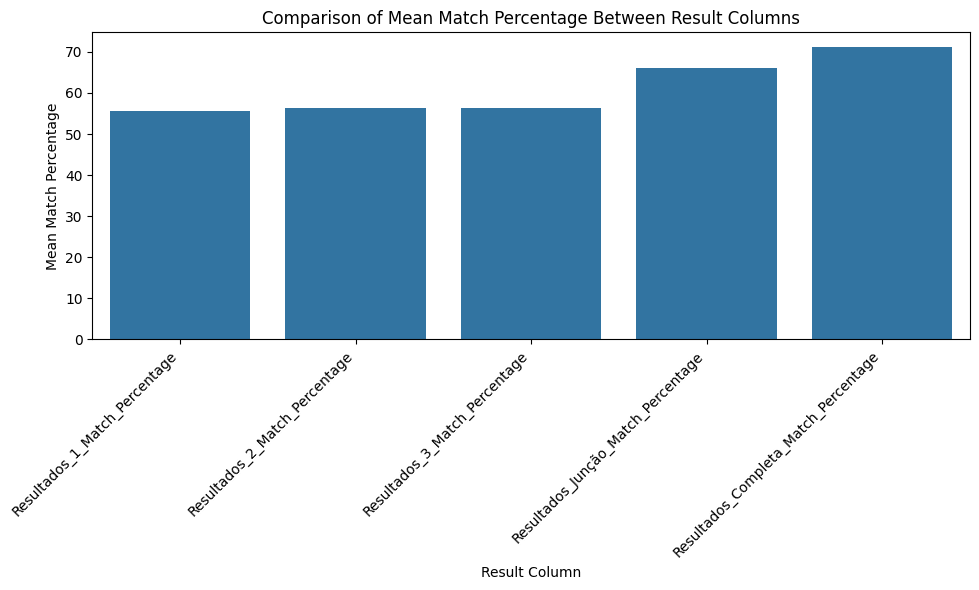

In [ ]:
percentage_columns = [col for col in df.columns if col.endswith('_Match_Percentage')]
mean_percentages = df[percentage_columns].mean().reset_index()
mean_percentages.columns = ['Result Column', 'Mean Match Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(x='Result Column', y='Mean Match Percentage', data=mean_percentages)
plt.title('Comparison of Mean Match Percentage Between Result Columns')
plt.xlabel('Result Column')
plt.ylabel('Mean Match Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
highest_match_news = {}
lowest_match_news = {}

for col in percentage_columns:
    max_percentage_row = df.loc[df[col].idxmax()]
    min_percentage_row = df.loc[df[col].idxmin()]

    highest_match_news[col] = max_percentage_row
    lowest_match_news[col] = min_percentage_row

print("Notícias com maior porcentagem de acerto:")
for col, row in highest_match_news.items():
    print(f"\nColuna: {col}")
    print(f"Porcentagem de Acerto: {row[col]:.2f}%")
    display(pd.DataFrame([row]))

print("\nNotícias com menor porcentagem de acerto:")
for col, row in lowest_match_news.items():
    print(f"\nColuna: {col}")
    print(f"Porcentagem de Acerto: {row[col]:.2f}%")
    display(pd.DataFrame([row]))

Notícias com maior porcentagem de acerto:

Coluna: Resultados_1_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Coluna: Resultados_2_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
26,gerado pelo gpt,Um vídeo publicado em diversas redes sociais m...,"De acordo com a publicação, o suposto estudo f...",Os comentários são cheios de depoimentos de pe...,Um vídeo publicado em diversas redes sociais m...,Pesquisadores alemães confirmam que o uso prol...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,100.0,80.0



Coluna: Resultados_3_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Coluna: Resultados_Junção_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
12,https://g1.globo.com/mundo/noticia/2025/11/04/...,O governo Trump está planejando operações mili...,Segundo fontes do governo americano ouvidas pe...,"Atualmente, a maior crise desencadeada pela aç...",O governo Trump está planejando operações mili...,O governo Trump está planejando operações mili...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1,0.0,0.0,60.0,100.0,80.0



Coluna: Resultados_Completa_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
8,https://istoe.com.br/criadores-dinamarqueses-p...,A Sociedade Dinamarquesa de Criadores Musicais...,"Segundo a organização, não foi divulgado quais...","Globalmente, a indústria musical está envolvid...",A Sociedade Dinamarquesa de Criadores Musicais...,A Sociedade Dinamarquesa de Criadores Musicais...,dtc:0\nlogreg:0\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:1,1,40.0,60.0,0.0,80.0,100.0



Notícias com menor porcentagem de acerto:

Coluna: Resultados_1_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0



Coluna: Resultados_2_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0



Coluna: Resultados_3_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0



Coluna: Resultados_Junção_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
2,https://entretenimento.r7.com/prisma/fabiola-r...,O nome de Dado Dolabella voltou a virar assunt...,Ele então tentou contextualizar a situação: “E...,"Questionado sobre o incidente, o ator responde...",O nome de Dado Dolabella voltou a virar assunt...,O nome de Dado Dolabella voltou a virar assunt...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,0.0,20.0



Coluna: Resultados_Completa_Match_Percentage
Porcentagem de Acerto: 20.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0


In [ ]:
# Separar o DataFrame onde 'REAL_OU_FAKE' é 0
df_fake = df[df['REAL_OU_FAKE'] == 0].copy()

# Separar o DataFrame onde 'REAL_OU_FAKE' é 1
df_real = df[df['REAL_OU_FAKE'] == 1].copy()

print("DataFrame com REAL_OU_FAKE = 0:")
display(df_fake.head())

print("\nDataFrame com REAL_OU_FAKE = 1:")
display(df_real.head())

DataFrame com REAL_OU_FAKE = 0:


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0
26,gerado pelo gpt,Um vídeo publicado em diversas redes sociais m...,"De acordo com a publicação, o suposto estudo f...",Os comentários são cheios de depoimentos de pe...,Um vídeo publicado em diversas redes sociais m...,Pesquisadores alemães confirmam que o uso prol...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,100.0,80.0
27,gerado pelo gpt,Uma mensagem alarmante circula em aplicativos ...,"De acordo com o conteúdo, a suposta tecnologia...",A mensagem inclui imagens de seringas e circui...,Uma mensagem alarmante circula em aplicativos ...,Vacina contra a gripe contém microchips rastre...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,100.0,100.0
28,gerado pelo gpt,Um texto que circula em redes sociais e blogs ...,O conteúdo afirma que basta misturar dentes de...,Os autores do texto alegam que o alho contém c...,Um texto que circula em redes sociais e blogs ...,Remédio natural à base de alho e mel cura o câ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,100.0,80.0
29,gerado pelo gpt,Uma postagem publicada em fóruns internacionai...,"O texto diz que a OMS teria admitido o erro, m...","Nas redes sociais, a narrativa foi reforçada p...",Uma postagem publicada em fóruns internacionai...,OMS admite em documento vazado que vacinas pro...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,100.0,100.0



DataFrame com REAL_OU_FAKE = 1:


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
0,https://g1.globo.com/politica/noticia/2025/11/...,O presidente Luiz Inácio Lula da Silva (PT) af...,"No dia seguinte à operação, o governador do Ri...","Na manifestação desta terça, Lula faz a primei...",O presidente Luiz Inácio Lula da Silva (PT) af...,O presidente Luiz Inácio Lula da Silva (PT) de...,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:0\nlogreg:1\npac:0\nrfc:1\nsvc:0,1,20.0,20.0,40.0,80.0,40.0
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0
2,https://entretenimento.r7.com/prisma/fabiola-r...,O nome de Dado Dolabella voltou a virar assunt...,Ele então tentou contextualizar a situação: “E...,"Questionado sobre o incidente, o ator responde...",O nome de Dado Dolabella voltou a virar assunt...,O nome de Dado Dolabella voltou a virar assunt...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,0.0,20.0
3,https://g1.globo.com/economia/censo/noticia/20...,O Instituto Brasileiro de Geografia e Estatíst...,O 2º sobrenome mais popular do Brasil é Santos...,No site do IBGE é possível consultar quão popu...,O Instituto Brasileiro de Geografia e Estatíst...,O Instituto Brasileiro de Geografia e Estatíst...,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,20.0,0.0,0.0,20.0,40.0
4,https://esportes.r7.com/lance/lutador-e-dispen...,"Uma controversa no UFC Vegas 110, neste sábado...","A suspeita surgiu, então, com o aumento consid...","A atuação de Dulgarian no ringue, durante o UF...","Uma controversa no UFC Vegas 110, neste sábado...","Uma controversa no UFC Vegas 110, neste sábado...",dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1,0.0,0.0,20.0,0.0,80.0


## Fake

In [ ]:
percentage_columns = [col for col in df_fake.columns if col.endswith('_Match_Percentage')]
descriptive_stats = df_fake[percentage_columns].describe()
display(descriptive_stats)

,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
count,25.0,25.0,25.0,25.00000,25.000000
mean,99.2,99.2,100.0,97.60000,92.800000
std,4.0,4.0,0.0,6.63325,9.797959
min,80.0,80.0,100.0,80.00000,80.000000
25%,100.0,100.0,100.0,100.00000,80.000000
50%,100.0,100.0,100.0,100.00000,100.000000
75%,100.0,100.0,100.0,100.00000,100.000000
max,100.0,100.0,100.0,100.00000,100.000000


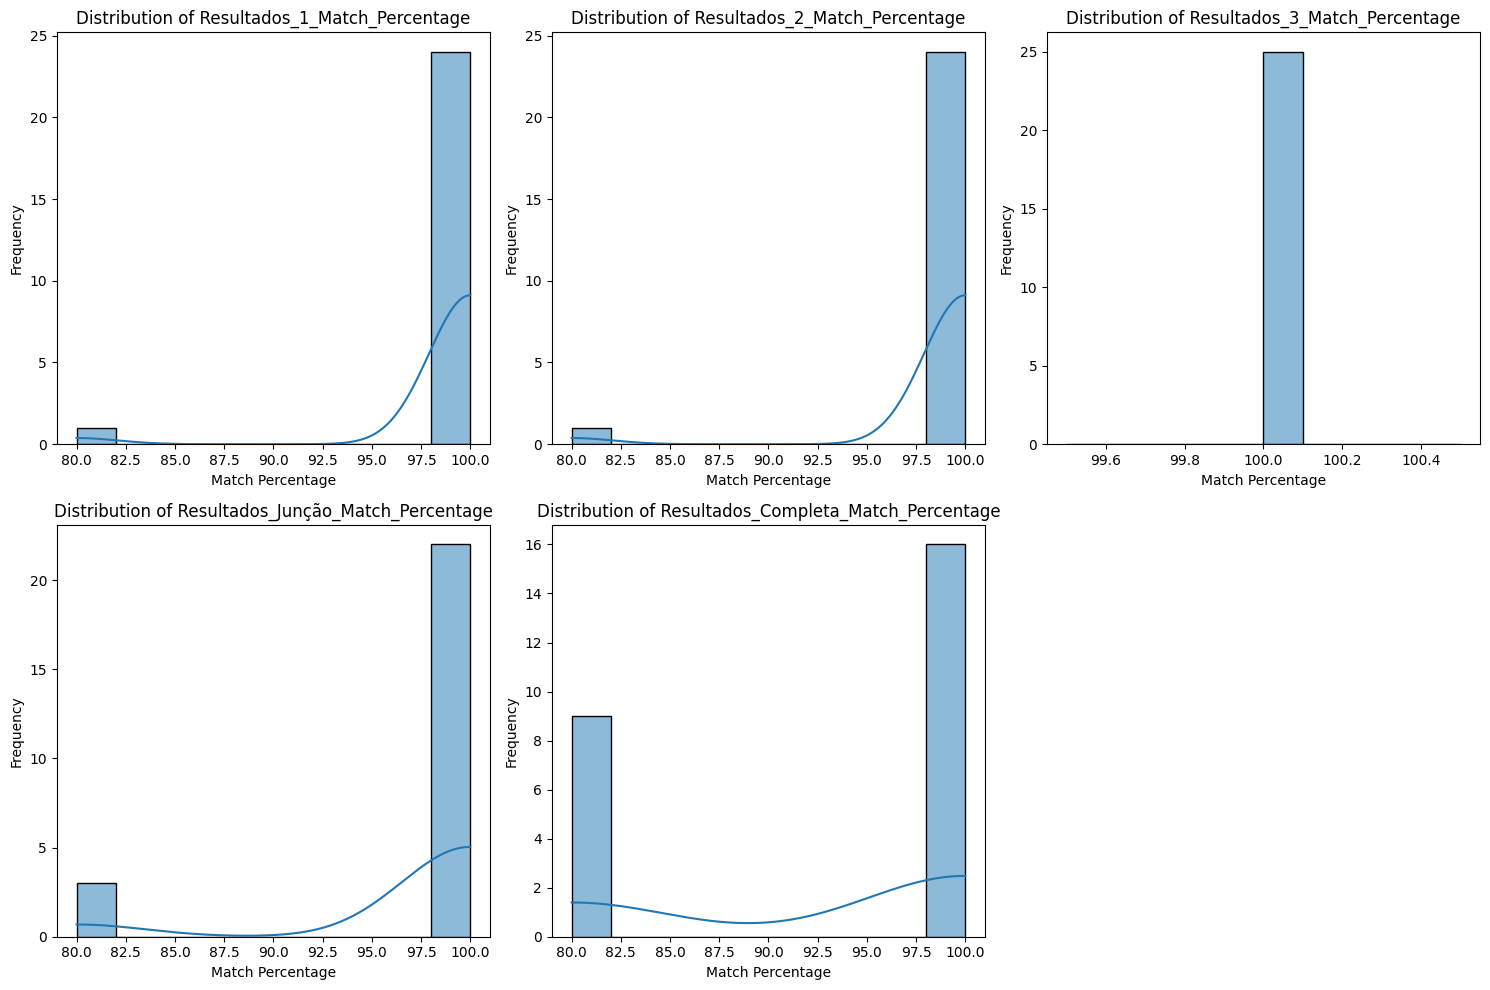

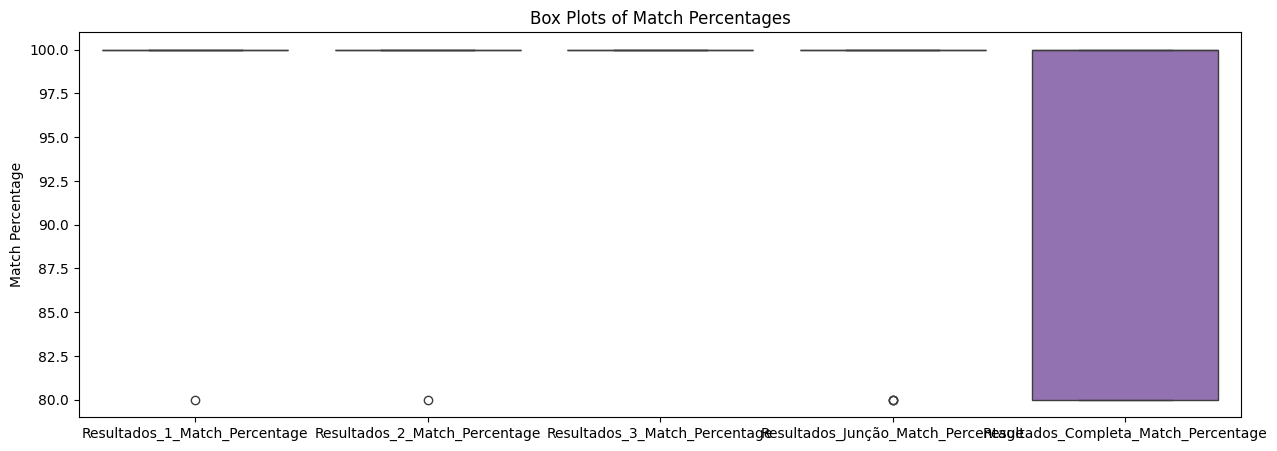

In [ ]:
percentage_columns = [col for col in df_fake.columns if col.endswith('_Match_Percentage')]

plt.figure(figsize=(15, 10))
for i, col in enumerate(percentage_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_fake[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Match Percentage')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(data=df_fake[percentage_columns])
plt.title('Box Plots of Match Percentages')
plt.ylabel('Match Percentage')
plt.show()

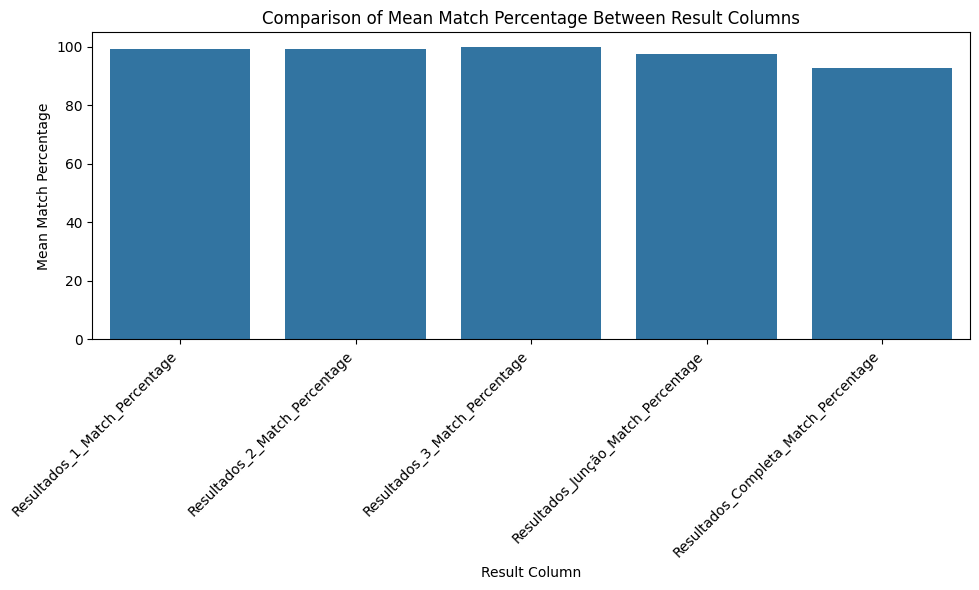

In [ ]:
percentage_columns = [col for col in df_fake.columns if col.endswith('_Match_Percentage')]
mean_percentages = df_fake[percentage_columns].mean().reset_index()
mean_percentages.columns = ['Result Column', 'Mean Match Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(x='Result Column', y='Mean Match Percentage', data=mean_percentages)
plt.title('Comparison of Mean Match Percentage Between Result Columns')
plt.xlabel('Result Column')
plt.ylabel('Mean Match Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
highest_match_news = {}
lowest_match_news = {}

for col in percentage_columns:
    max_percentage_row = df_fake.loc[df_fake[col].idxmax()]
    min_percentage_row = df_fake.loc[df_fake[col].idxmin()]

    highest_match_news[col] = max_percentage_row
    lowest_match_news[col] = min_percentage_row

print("Notícias com maior porcentagem de acerto:")
for col, row in highest_match_news.items():
    print(f"\nColuna: {col}")
    print(f"Porcentagem de Acerto: {row[col]:.2f}%")
    display(pd.DataFrame([row]))

print("\nNotícias com menor porcentagem de acerto:")
for col, row in lowest_match_news.items():
    print(f"\nColuna: {col}")
    print(f"Porcentagem de Acerto: {row[col]:.2f}%")
    display(pd.DataFrame([row]))

Notícias com maior porcentagem de acerto:

Coluna: Resultados_1_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Coluna: Resultados_2_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
26,gerado pelo gpt,Um vídeo publicado em diversas redes sociais m...,"De acordo com a publicação, o suposto estudo f...",Os comentários são cheios de depoimentos de pe...,Um vídeo publicado em diversas redes sociais m...,Pesquisadores alemães confirmam que o uso prol...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,100.0,80.0



Coluna: Resultados_3_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Coluna: Resultados_Junção_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Coluna: Resultados_Completa_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Notícias com menor porcentagem de acerto:

Coluna: Resultados_1_Match_Percentage
Porcentagem de Acerto: 80.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
46,gerado pelo gpt,Um vídeo que viralizou nas redes sociais mostr...,O boato rapidamente ganhou proporções mundiais...,Imagens manipuladas foram usadas para reforçar...,Um vídeo que viralizou nas redes sociais mostr...,Cantora internacional é flagrada realizando ri...,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,80.0,100.0,100.0,80.0,80.0



Coluna: Resultados_2_Match_Percentage
Porcentagem de Acerto: 80.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Coluna: Resultados_3_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
25,gerado pelo gpt,Novo estudo prova que beber água com limão em ...,"Segundo o texto, a pesquisa teria sido realiza...",O conteúdo segue afirmando que grandes laborat...,Novo estudo prova que beber água com limão em ...,Novo estudo prova que beber água com limão em ...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,80.0,100.0,100.0,100.0



Coluna: Resultados_Junção_Match_Percentage
Porcentagem de Acerto: 80.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
37,gerado pelo gpt,Uma matéria publicada em um blog anônimo afirm...,A notícia usa trechos inventados de uma coleti...,"Em comunidades online, usuários começaram a pu...",Uma matéria publicada em um blog anônimo afirm...,Google anuncia que vai apagar canais do YouTub...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,80.0,80.0



Coluna: Resultados_Completa_Match_Percentage
Porcentagem de Acerto: 80.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
26,gerado pelo gpt,Um vídeo publicado em diversas redes sociais m...,"De acordo com a publicação, o suposto estudo f...",Os comentários são cheios de depoimentos de pe...,Um vídeo publicado em diversas redes sociais m...,Pesquisadores alemães confirmam que o uso prol...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,0,100.0,100.0,100.0,100.0,80.0


## Real

In [ ]:
percentage_columns = [col for col in df_real.columns if col.endswith('_Match_Percentage')]
descriptive_stats = df_real[percentage_columns].describe()
display(descriptive_stats)

,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
count,25.000000,25.00000,25.000000,25.000000,25.000000
mean,12.000000,13.60000,12.800000,34.400000,49.600000
std,14.142136,20.59126,19.899749,29.732137,27.760884
min,0.000000,0.00000,0.000000,0.000000,20.000000
25%,0.000000,0.00000,0.000000,20.000000,20.000000
50%,0.000000,0.00000,0.000000,20.000000,40.000000
75%,20.000000,20.00000,20.000000,40.000000,80.000000
max,40.000000,80.00000,60.000000,100.000000,100.000000


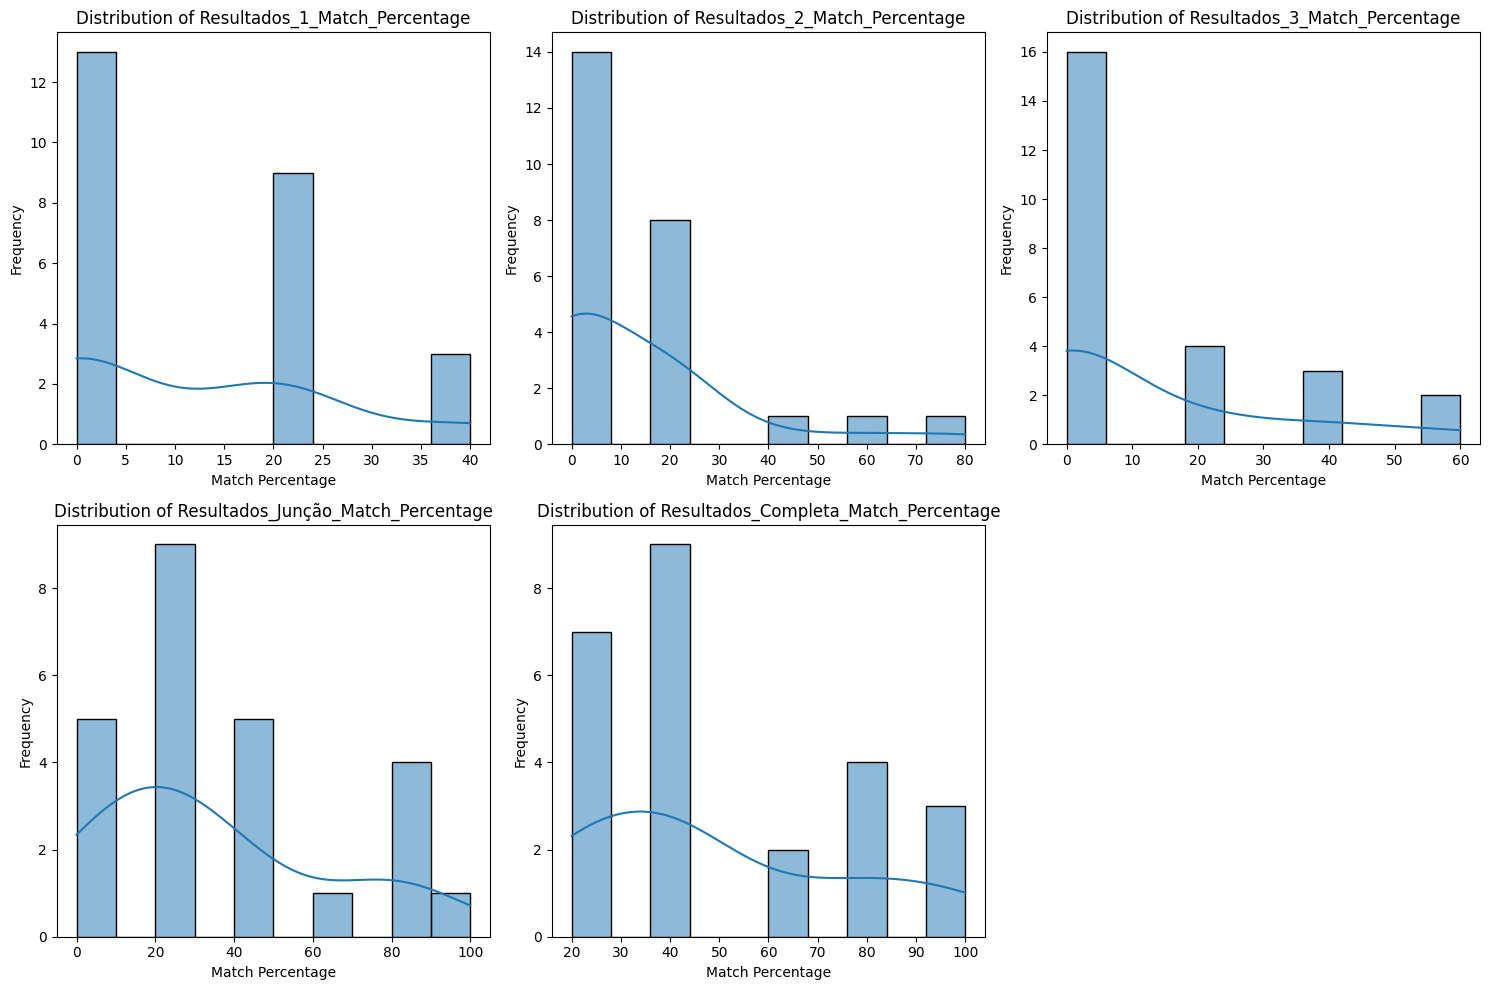

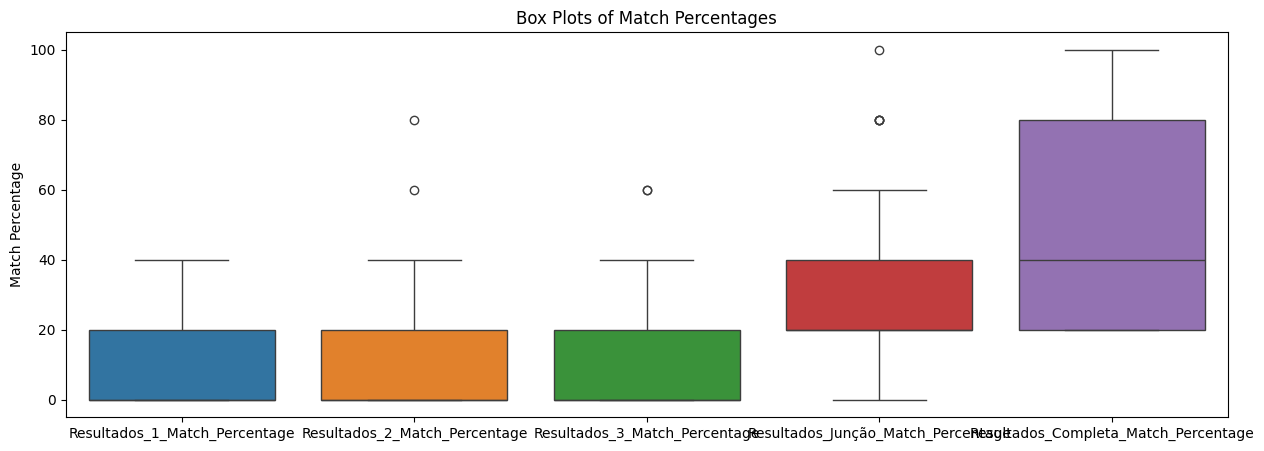

In [ ]:
percentage_columns = [col for col in df_real.columns if col.endswith('_Match_Percentage')]

plt.figure(figsize=(15, 10))
for i, col in enumerate(percentage_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_real[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Match Percentage')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(data=df_real[percentage_columns])
plt.title('Box Plots of Match Percentages')
plt.ylabel('Match Percentage')
plt.show()

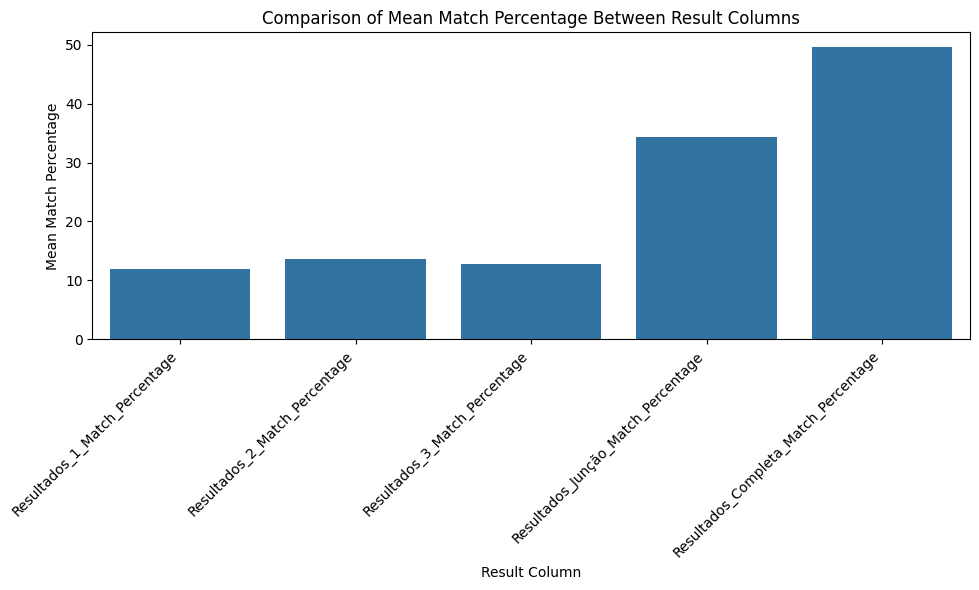

In [ ]:
percentage_columns = [col for col in df_real.columns if col.endswith('_Match_Percentage')]
mean_percentages = df_real[percentage_columns].mean().reset_index()
mean_percentages.columns = ['Result Column', 'Mean Match Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(x='Result Column', y='Mean Match Percentage', data=mean_percentages)
plt.title('Comparison of Mean Match Percentage Between Result Columns')
plt.xlabel('Result Column')
plt.ylabel('Mean Match Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
highest_match_news = {}
lowest_match_news = {}

for col in percentage_columns:
    max_percentage_row = df_real.loc[df_real[col].idxmax()]
    min_percentage_row = df_real.loc[df_real[col].idxmin()]

    highest_match_news[col] = max_percentage_row
    lowest_match_news[col] = min_percentage_row

print("Notícias com maior porcentagem de acerto:")
for col, row in highest_match_news.items():
    print(f"\nColuna: {col}")
    print(f"Porcentagem de Acerto: {row[col]:.2f}%")
    display(pd.DataFrame([row]))

print("\nNotícias com menor porcentagem de acerto:")
for col, row in lowest_match_news.items():
    print(f"\nColuna: {col}")
    print(f"Porcentagem de Acerto: {row[col]:.2f}%")
    display(pd.DataFrame([row]))

Notícias com maior porcentagem de acerto:

Coluna: Resultados_1_Match_Percentage
Porcentagem de Acerto: 40.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
8,https://istoe.com.br/criadores-dinamarqueses-p...,A Sociedade Dinamarquesa de Criadores Musicais...,"Segundo a organização, não foi divulgado quais...","Globalmente, a indústria musical está envolvid...",A Sociedade Dinamarquesa de Criadores Musicais...,A Sociedade Dinamarquesa de Criadores Musicais...,dtc:0\nlogreg:0\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:1,1,40.0,60.0,0.0,80.0,100.0



Coluna: Resultados_2_Match_Percentage
Porcentagem de Acerto: 80.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
23,https://www.redetv.uol.com.br/jornalismo/geral...,"No bairro da Penha, na zona norte do Rio de Ja...","“Todos que vêm, sejam mães, familiares, amigos...",A igreja fica a um quilômetro (Km) da Praça Sã...,"No bairro da Penha, na zona norte do Rio de Ja...","No bairro da Penha, na zona norte do Rio de Ja...",dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:1\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1,0.0,80.0,20.0,80.0,80.0



Coluna: Resultados_3_Match_Percentage
Porcentagem de Acerto: 60.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
12,https://g1.globo.com/mundo/noticia/2025/11/04/...,O governo Trump está planejando operações mili...,Segundo fontes do governo americano ouvidas pe...,"Atualmente, a maior crise desencadeada pela aç...",O governo Trump está planejando operações mili...,O governo Trump está planejando operações mili...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1,0.0,0.0,60.0,100.0,80.0



Coluna: Resultados_Junção_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
12,https://g1.globo.com/mundo/noticia/2025/11/04/...,O governo Trump está planejando operações mili...,Segundo fontes do governo americano ouvidas pe...,"Atualmente, a maior crise desencadeada pela aç...",O governo Trump está planejando operações mili...,O governo Trump está planejando operações mili...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:0,1,0.0,0.0,60.0,100.0,80.0



Coluna: Resultados_Completa_Match_Percentage
Porcentagem de Acerto: 100.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
8,https://istoe.com.br/criadores-dinamarqueses-p...,A Sociedade Dinamarquesa de Criadores Musicais...,"Segundo a organização, não foi divulgado quais...","Globalmente, a indústria musical está envolvid...",A Sociedade Dinamarquesa de Criadores Musicais...,A Sociedade Dinamarquesa de Criadores Musicais...,dtc:0\nlogreg:0\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:1\nlogreg:1\npac:1\nrfc:0\nsvc:1,dtc:1\nlogreg:1\npac:1\nrfc:1\nsvc:1,1,40.0,60.0,0.0,80.0,100.0



Notícias com menor porcentagem de acerto:

Coluna: Resultados_1_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0



Coluna: Resultados_2_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0



Coluna: Resultados_3_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0



Coluna: Resultados_Junção_Match_Percentage
Porcentagem de Acerto: 0.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
2,https://entretenimento.r7.com/prisma/fabiola-r...,O nome de Dado Dolabella voltou a virar assunt...,Ele então tentou contextualizar a situação: “E...,"Questionado sobre o incidente, o ator responde...",O nome de Dado Dolabella voltou a virar assunt...,O nome de Dado Dolabella voltou a virar assunt...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,0.0,20.0



Coluna: Resultados_Completa_Match_Percentage
Porcentagem de Acerto: 20.00%


,link,Trecho_1,Trecho_2,Trecho_3,Juntando_Trechos,Noticia_Completa,Resultados_1,Resultados_2,Resultados_3,Resultados_Junção,Resultados_Completa,REAL_OU_FAKE,Resultados_1_Match_Percentage,Resultados_2_Match_Percentage,Resultados_3_Match_Percentage,Resultados_Junção_Match_Percentage,Resultados_Completa_Match_Percentage
1,https://www.redetv.uol.com.br/esportes/futinte...,Mesmo sem chances de se classificar para a pró...,De acordo com informações do portal Sport News...,"Além de Angola, outras seleções africanas tamb...",Mesmo sem chances de se classificar para a pró...,Mesmo sem chances de se classificar para a pró...,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:0\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,dtc:0\nlogreg:1\npac:0\nrfc:0\nsvc:0,1,0.0,0.0,0.0,20.0,20.0


## HeatMaps

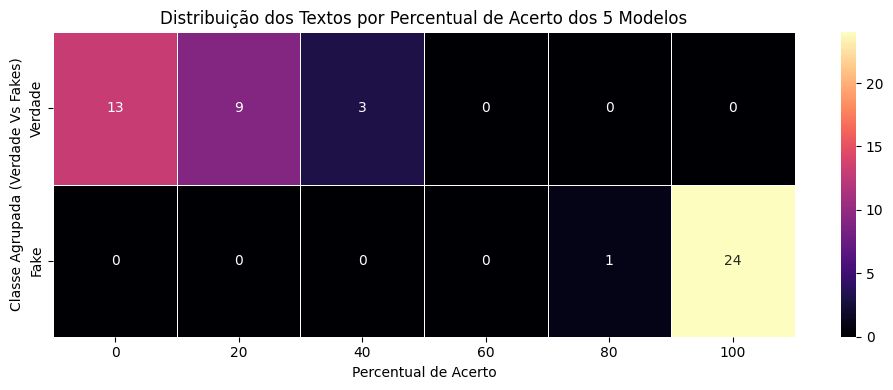

In [ ]:
# Lista com os percentuais já calculados por texto
# Exemplo: [0, 20, 20, 40, 100, 80, ...]
percentuais_1 = df_real['Resultados_1_Match_Percentage']  # substitua por sua lista real
percentuais_2 = df_fake['Resultados_1_Match_Percentage']

# Converte para DataFrame
df_1 = pd.DataFrame({"percentual": percentuais_1})
df_2 = pd.DataFrame({"percentual": percentuais_2})

# Prepara a matriz 2x6
colunas = [0, 20, 40, 60, 80, 100]
linhas = ['Verdade','Fake']

matriz = np.zeros((2, 6))

# Preenche matriz
# Linha 0 = 100% acerto total
# Linha 1 = 0% total erro
for p in percentuais_1:
        matriz[0, colunas.index(p)] += 1

for p in percentuais_2:
        matriz[1, colunas.index(p)] += 1

# Plot
plt.figure(figsize=(10,4))
sns.heatmap(
    matriz,
    annot=True,
    fmt=".0f",
    cmap="magma",
    xticklabels=colunas,
    yticklabels=linhas,
    linewidths=.5
)

plt.xlabel("Percentual de Acerto")
plt.ylabel("Classe Agrupada (Verdade Vs Fakes)")
plt.title("Distribuição dos Textos por Percentual de Acerto dos 5 Modelos")
plt.tight_layout()
plt.show()

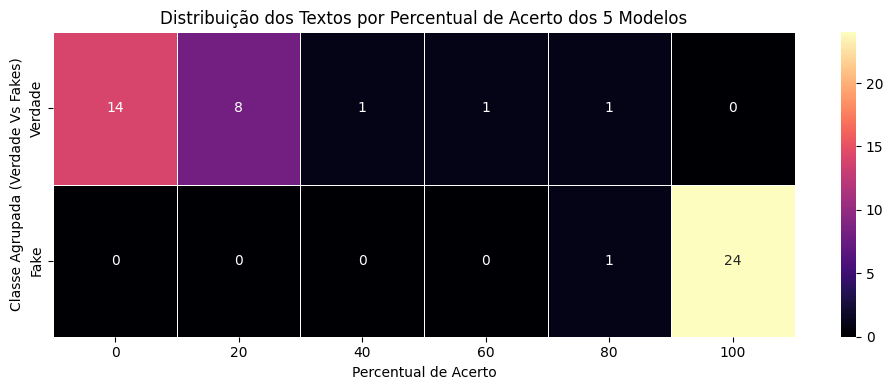

In [ ]:
# Lista com os percentuais já calculados por texto
# Exemplo: [0, 20, 20, 40, 100, 80, ...]
percentuais_1 = df_real['Resultados_2_Match_Percentage']  # substitua por sua lista real
percentuais_2 = df_fake['Resultados_2_Match_Percentage']

# Converte para DataFrame
df_1 = pd.DataFrame({"percentual": percentuais_1})
df_2 = pd.DataFrame({"percentual": percentuais_2})

# Prepara a matriz 2x6
colunas = [0, 20, 40, 60, 80, 100]
linhas = ['Verdade','Fake']

matriz = np.zeros((2, 6))

# Preenche matriz
# Linha 0 = 100% acerto total
# Linha 1 = 0% total erro
for p in percentuais_1:
        matriz[0, colunas.index(p)] += 1

for p in percentuais_2:
        matriz[1, colunas.index(p)] += 1

# Plot
plt.figure(figsize=(10,4))
sns.heatmap(
    matriz,
    annot=True,
    fmt=".0f",
    cmap="magma",
    xticklabels=colunas,
    yticklabels=linhas,
    linewidths=.5
)

plt.xlabel("Percentual de Acerto")
plt.ylabel("Classe Agrupada (Verdade Vs Fakes)")
plt.title("Distribuição dos Textos por Percentual de Acerto dos 5 Modelos")
plt.tight_layout()
plt.show()

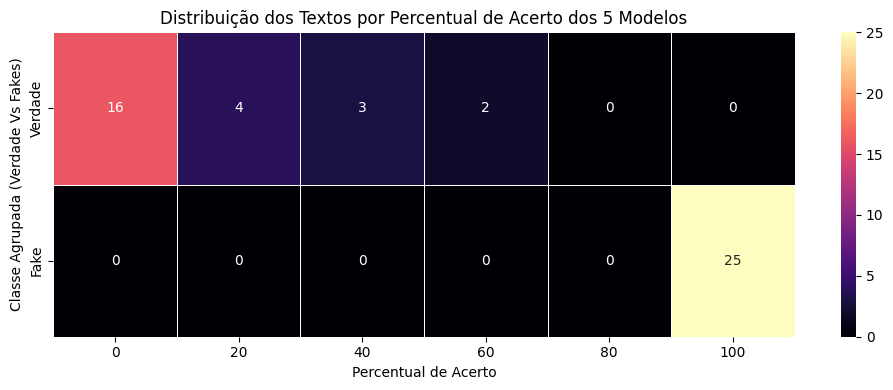

In [ ]:
# Lista com os percentuais já calculados por texto
# Exemplo: [0, 20, 20, 40, 100, 80, ...]
percentuais_1 = df_real['Resultados_3_Match_Percentage']  # substitua por sua lista real
percentuais_2 = df_fake['Resultados_3_Match_Percentage']

# Converte para DataFrame
df_1 = pd.DataFrame({"percentual": percentuais_1})
df_2 = pd.DataFrame({"percentual": percentuais_2})

# Prepara a matriz 2x6
colunas = [0, 20, 40, 60, 80, 100]
linhas = ['Verdade','Fake']

matriz = np.zeros((2, 6))

# Preenche matriz
# Linha 0 = 100% acerto total
# Linha 1 = 0% total erro
for p in percentuais_1:
        matriz[0, colunas.index(p)] += 1

for p in percentuais_2:
        matriz[1, colunas.index(p)] += 1

# Plot
plt.figure(figsize=(10,4))
sns.heatmap(
    matriz,
    annot=True,
    fmt=".0f",
    cmap="magma",
    xticklabels=colunas,
    yticklabels=linhas,
    linewidths=.5
)

plt.xlabel("Percentual de Acerto")
plt.ylabel("Classe Agrupada (Verdade Vs Fakes)")
plt.title("Distribuição dos Textos por Percentual de Acerto dos 5 Modelos")
plt.tight_layout()
plt.show()

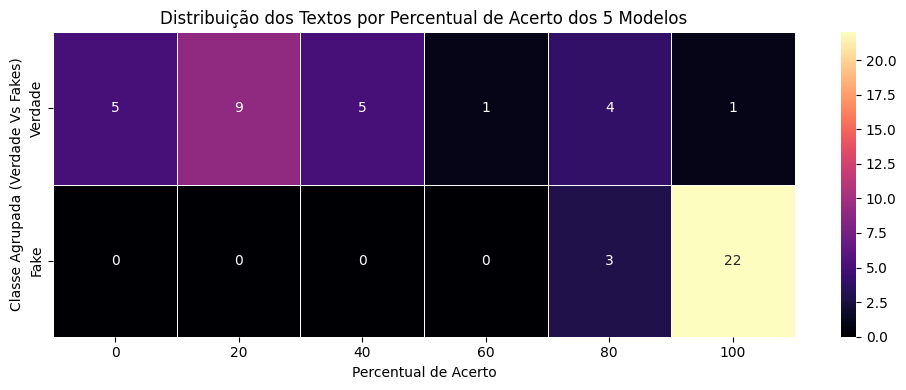

In [ ]:
# Lista com os percentuais já calculados por texto
# Exemplo: [0, 20, 20, 40, 100, 80, ...]
percentuais_1 = df_real['Resultados_Junção_Match_Percentage']  # substitua por sua lista real
percentuais_2 = df_fake['Resultados_Junção_Match_Percentage']

# Converte para DataFrame
df_1 = pd.DataFrame({"percentual": percentuais_1})
df_2 = pd.DataFrame({"percentual": percentuais_2})

# Prepara a matriz 2x6
colunas = [0, 20, 40, 60, 80, 100]
linhas = ['Verdade','Fake']

matriz = np.zeros((2, 6))

# Preenche matriz
# Linha 0 = 100% acerto total
# Linha 1 = 0% total erro
for p in percentuais_1:
        matriz[0, colunas.index(p)] += 1

for p in percentuais_2:
        matriz[1, colunas.index(p)] += 1

# Plot
plt.figure(figsize=(10,4))
sns.heatmap(
    matriz,
    annot=True,
    fmt=".0f",
    cmap="magma",
    xticklabels=colunas,
    yticklabels=linhas,
    linewidths=.5
)

plt.xlabel("Percentual de Acerto")
plt.ylabel("Classe Agrupada (Verdade Vs Fakes)")
plt.title("Distribuição dos Textos por Percentual de Acerto dos 5 Modelos")
plt.tight_layout()
plt.show()

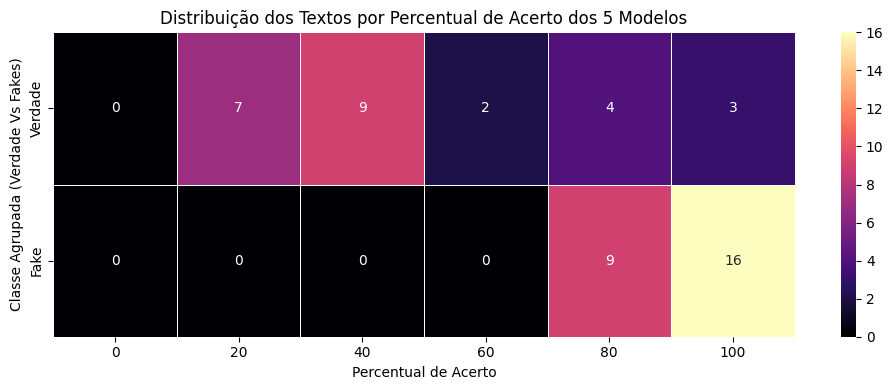

In [ ]:
# Lista com os percentuais já calculados por texto
# Exemplo: [0, 20, 20, 40, 100, 80, ...]
percentuais_1 = df_real['Resultados_Completa_Match_Percentage']  # substitua por sua lista real
percentuais_2 = df_fake['Resultados_Completa_Match_Percentage']

# Converte para DataFrame
df_1 = pd.DataFrame({"percentual": percentuais_1})
df_2 = pd.DataFrame({"percentual": percentuais_2})

# Prepara a matriz 2x6
colunas = [0, 20, 40, 60, 80, 100]
linhas = ['Verdade','Fake']

matriz = np.zeros((2, 6))

# Preenche matriz
# Linha 0 = 100% acerto total
# Linha 1 = 0% total erro
for p in percentuais_1:
        matriz[0, colunas.index(p)] += 1

for p in percentuais_2:
        matriz[1, colunas.index(p)] += 1

# Plot
plt.figure(figsize=(10,4))
sns.heatmap(
    matriz,
    annot=True,
    fmt=".0f",
    cmap="magma",
    xticklabels=colunas,
    yticklabels=linhas,
    linewidths=.5
)

plt.xlabel("Percentual de Acerto")
plt.ylabel("Classe Agrupada (Verdade Vs Fakes)")
plt.title("Distribuição dos Textos por Percentual de Acerto dos 5 Modelos")
plt.tight_layout()
plt.show()

## Separação por %'s

<Figure size 700x600 with 0 Axes>

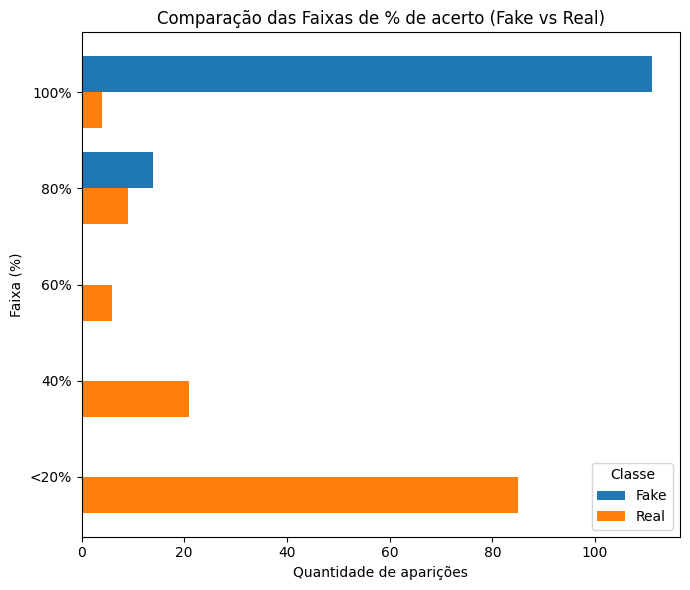

In [ ]:
colunas = [
    'Resultados_1_Match_Percentage',
    'Resultados_2_Match_Percentage',
    'Resultados_3_Match_Percentage',
    'Resultados_Junção_Match_Percentage',
    'Resultados_Completa_Match_Percentage'
]

# ===========================================================
# 1. Transformar cada DF em formato long separadamente
# ===========================================================

fake_long = df_fake.melt(
    value_vars=colunas,
    var_name='origem',
    value_name='porcentagem'
)

real_long = df_real.melt(
    value_vars=colunas,
    var_name='origem',
    value_name='porcentagem'
)

# Converter string "100%" para número inteiro
fake_long["porcentagem"] = fake_long["porcentagem"].replace("%","", regex=True).astype(int)
real_long["porcentagem"]  = real_long["porcentagem"].replace("%","", regex=True).astype(int)

# ===========================================================
# 2. Criar faixas de acurácia
# ===========================================================

def faixa(p):
    if p == 100:
        return "100%"
    elif p >= 80:
        return "80%"
    elif p >= 60:
        return "60%"
    elif p >= 40:
        return "40%"
    else:
        return "<20%"

fake_long["faixa"] = fake_long["porcentagem"].apply(faixa)
real_long["faixa"] = real_long["porcentagem"].apply(faixa)

# ===========================================================
# 3. Contar ocorrências por faixa
# ===========================================================

cont_fake = fake_long["faixa"].value_counts()
cont_real = real_long["faixa"].value_counts()

# Reordenar as faixas
ordem = ["100%",'80%', "60%", "40%", "<20%"]

cont_fake = cont_fake.reindex(ordem, fill_value=0)
cont_real = cont_real.reindex(ordem, fill_value=0)

# ===========================================================
# 4. Juntar em um único dataframe para o gráfico
# ===========================================================

comparacao = pd.DataFrame({
    "Fake": cont_fake,
    "Real": cont_real
})

# ===========================================================
# 5. GRÁFICO FINAL (igual ao modelo da sua imagem)
# ===========================================================

plt.figure(figsize=(7,6))
comparacao.plot(kind="barh", figsize=(7,6), width=0.75)

plt.gca().invert_yaxis()

plt.title("Comparação das Faixas de % de acerto (Fake vs Real)")
plt.xlabel("Quantidade de aparições")
plt.ylabel("Faixa (%)")
plt.legend(title="Classe", loc="lower right")

plt.tight_layout()
plt.show()

# Conclusão


Com base na análise do dataset completo e dos datasets separados por `REAL_OU_FAKE`, podemos tirar as seguintes conclusões:

**Dataset Completo:**

*   As distribuições das porcentagens de acerto para as colunas de resultados (`Resultados_1` a `Resultados_Completa`) mostram variabilidade, indicando que o desempenho dos modelos varia dependendo de qual parte da notícia foi usada para a classificação.
*   O box plot reforça essa variabilidade, mostrando a dispersão e a presença de outliers em algumas colunas.
*   A média de porcentagem de acerto varia entre as colunas de resultados, com a coluna `Resultados_Completa_Match_Percentage` apresentando a maior média, sugerindo que usar a notícia completa tende a gerar melhores resultados gerais.

**Dataset "Fake" (`REAL_OU_FAKE` = 0):**

*   As notícias classificadas como "fake" apresentam porcentagens de acerto consistentemente altas em todas as colunas de resultados. As distribuições mostram um pico próximo a 100%, e as estatísticas descritivas confirmam médias elevadas e baixos desvios padrão.
*   Isso sugere que os modelos foram muito eficazes em identificar notícias falsas neste dataset.

**Dataset "Real" (`REAL_OU_FAKE` = 1):**

*   Em contraste, as notícias classificadas como "real" apresentam porcentagens de acerto significativamente menores. As distribuições são mais dispersas e as médias são consideravelmente mais baixas em comparação com o dataset "fake".
*   Isso indica que os modelos tiveram mais dificuldade em classificar corretamente as notícias reais neste dataset específico.

**Conclusão Geral:**

A análise revela uma clara diferença no desempenho dos modelos ao classificar notícias "fake" versus notícias "real" neste dataset. Embora os modelos sejam altamente eficazes na identificação de notícias falsas, sua precisão é notavelmente menor ao lidar com notícias reais. A coluna `Resultados_Completa` parece ser a mais promissora para a classificação geral, mas a dificuldade em classificar notícias reais aponta para a necessidade de investigar os motivos por trás dessa disparidade e, possivelmente, aprimorar os modelos ou o conjunto de dados para melhorar a detecção de notícias reais.